# Notes: Circuit Architecture

### by ReDay Zarra

## Setup

In [1]:
import sys
print(sys.version)

3.9.17 (main, Jun  6 2023, 20:11:21) 
[GCC 11.3.0]


In [2]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/lib/python3/dist-packages/pkg_resources/__init__.py'>

In [3]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

2023-07-01 07:11:10.640564: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-01 07:11:10.640612: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
2023-07-01 07:11:14.801024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-01 07:11:14.801082: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-01 07:11:14.801177: I tensorflow/stream_executor/cuda/cuda_diagnostics

In [4]:
# Visualization tools: matplotlib and Cirq's svg circuit
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [5]:
print("TensorFlow version: ", tf.__version__)
print("TensorFlow Quantum version: ", tfq.__version__)
print("Cirq version: ", cirq.__version__)

TensorFlow version:  2.7.0
TensorFlow Quantum version:  0.7.2
Cirq version:  1.1.0


## Cirq Basics

### Circuit Architecture

Quantum programs are primarily represented by the `Circuit` class in Cirq. 

`Circuit`: This is the main way quantum programs are represented in Cirq. A quantum circuit is a **sequence of operations (quantum gates) that are applied to quantum bits (qubits)**. The operations are executed in the order they appear in the circuit.

`Moment`: A moment is a specific slice or layer in a quantum circuit during which a set of operations (gates) take place. All operations within a single moment are assumed to happen simultaneously, i.e., at the same time. A circuit is a collection of these moments.

`Operations`: Operations represent the application of a quantum gate on a specific set of qubits. This is a basic event in a quantum circuit. The gate tells you what to do (the operation), and the qubits tell you where to do it.

`GateOperation`: A GateOperation is the most common type of operation. It represents the application of a specific gate (like X, Y, Z, Hadamard, CNOT, etc.) to a set of qubits. For instance, an X gate (bit flip) applied to the first qubit would be a GateOperation.

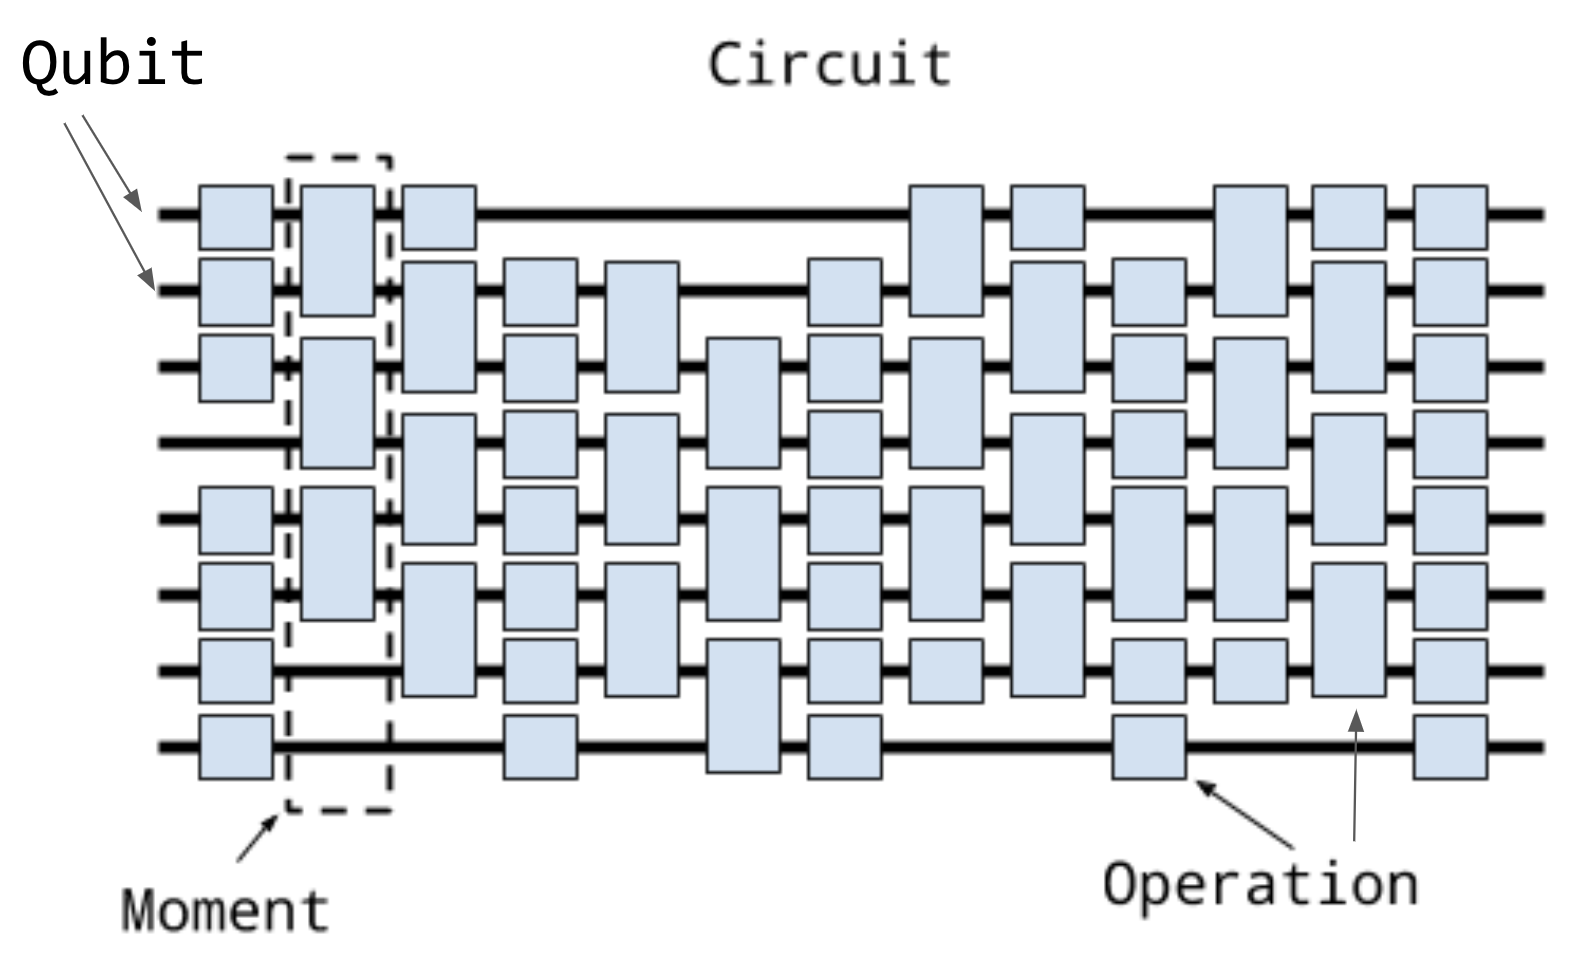

### Qubits

**Qubit**: In quantum computing, a qubit or "quantum bit" is the **basic unit of quantum information**. It's similar to a classical bit, but instead of just being in a state of 0 or 1, a qubit can be in a state that is a superposition of both.

`cirq.Qid`: In Cirq, qubits and other quantum objects are represented as instances of subclasses of the `cirq.Qid` base class. 'Qid' stands for 'quantum id' and it is a class used to label and identify qubits.

`cirq.GridQubit`: This is a subclass of `cirq.Qid` used to represent qubits that are arranged in a square grid, which is often the case for **Google’s quantum devices**. Each `GridQubit` has two integer coordinates, representing its row and column in the grid.

In [6]:
qubits = cirq.GridQubit.square(3)

print(qubits[0])
print(qubits)

q(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2)]


### Gates

Quantum gates are the building blocks of quantum circuits and quantum algorithms. They are the quantum analogue of classical logic gates. Each type of quantum gate performs a specific unitary transformation on the state of a qubit.

`cirq.Gate`: a quantum gate, which is a basic operation that can be performed on one or more qubits.

Applying a gate to a qubit is **essentially specifying that a certain operation should be performed on that qubit**. This can be done via the `gate.on(*qubits)` method or more directly as `gate(*qubits)`.

When you apply a gate to a qubit, you get a `cirq.Operation`. A `cirq.Operation` represents the application of a gate to a specific qubit.

In [7]:
# Pauli X gate - acts like a bit-flip: it takes |0⟩ to |1⟩ and |1⟩ to |0⟩.
x_gate = cirq.X

# Applying the x_gate to the first qubit in list of qubits. 
# The result is a cirq.Operation that represents the application of the X gate to the qubit at (0, 0).
x_op = x_gate(qubits[0])

print(x_op)

X(q(0, 0))


### Moments

`cirq.Moment`: a collection of quantum operations, where each operation is acting on a different set of qubits, and all of these operations are considered to be happening at the same abstract "time slice" in the circuit.

Essentially, a Moment is a step in the quantum circuit where a specific **set of operations are being applied**. All the operations in a single Moment are assumed to be **happening simultaneously**. The code below is not the typical way to construct moments but shows that moments are just a collection of operations on qubits.

In [8]:
# Create a CZ (controlled-Z) gate operation on the first and second qubits in list of qubits
cz = cirq.CZ(qubits[0], qubits[1])

# Create a X gate operation on the third qubit in the list
x = cirq.X(qubits[2])

# Create a Moment containing the two operations: "cz" and "x"
moment = cirq.Moment(x, cz)
print(moment)

  ╷ 0 1 2
╶─┼───────
0 │ @─@ X
  │


### Circuits

`cirq.Circuit`:  the highest level object in Cirq's quantum program representation. It represents a quantum circuit as an ordered sequence of `cirq.Moment` objects. Each `cirq.Moment` in the cirq.Circuit is a "time slice" of the circuit. 

**Moments are ordered**: the first Moment contains the operations that will be applied first, the second Moment contains the operations that will be applied next, and so on. Each **Moment can contain multiple operations**, as long as they act on disjoint sets of qubits (meaning, **they don't act on the same qubit at the same time**).

In [9]:
# Create a CZ (controlled-Z) operation on the first and second qubits
cz01 = cirq.CZ(qubits[0], qubits[1])

# Create an X operation on the third qubit
x2 = cirq.X(qubits[2])

# Create a CZ operation on the second and third qubits
cz12 = cirq.CZ(qubits[1], qubits[2])

# Construct the two moments
moment0 = cirq.Moment([cz01, x2]) 
moment1 = cirq.Moment([cz12])

# Create a circuit with the two moments
circuit = cirq.Circuit((moment0, moment1))
print(circuit)

(0, 0): ───@───────
           │
(0, 1): ───@───@───
               │
(0, 2): ───X───@───
